In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
from PIL import Image
from ipywidgets import interact

In [12]:
plt.rcParams['figure.figsize']=(12,8)   #Bigger Pictures (12,8)---- standar size(9,5)
#print (plt.style.available)
#plt.style.use('bmh')  #Plot style

In [2]:
class perro():
    
    def __init__(self,nombre):
        self.nombre = nombre
        
    def ladra(self):
        s = ""
        for l in self.nombre:
            s += 'wof'
        print(s)
    
    def caca(self):
        print('Hago caca')
        
    def hablar(self):
        s = 0
        for l in self.nombre:
            s += 1
        print('voy la ladrar',s,'veces')    

In [3]:
coco = perro('coco')

In [4]:
coco.ladra()

wofwofwofwof


In [5]:
coco.caca()

Hago caca


In [6]:
coco.hablar()

voy la ladrar 4 veces


## 2. Ising Model

In [8]:
def random_spin_field(N, M):
    return np.random.choice([-1, 1], size=(N, M))

def display_spin_field(field):
    return Image.fromarray(np.uint8((field + 1) * 0.5 * 255))

def ising_step(field, beta=0.4):
    N, M = field.shape
    for n_offset in range(2):
        for m_offset in range(2):
            for n in range(n_offset, N, 2):
                for m in range(m_offset, M, 2):
                    _ising_update(field, n, m, beta)
    return field

def _ising_update(field, n, m, beta):
    total = 0
    N, M = field.shape
    for i in range(n-1, n+2):
        for j in range(m-1, m+2):
            if i == n and j == m:
                continue
            total += field[i % N, j % M]
    dE = 2 * field[n, m] * total
    if dE <= 0:
        field[n, m] *= -1
    elif np.exp(-dE * beta) > np.random.rand():
        field[n, m] *= -1
        
        

In [18]:
A = random_spin_field(400,400)

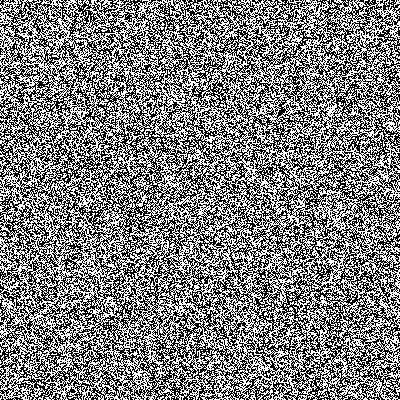

In [19]:
display_spin_field(A)

In [16]:
def display_ising_sequence(images):
    def _show(frame=(0, len(images) - 1)):
        return display_spin_field(images[frame])
    return interact(_show)

In [20]:
images = [A]
for i in range(50):
    images.append(ising_step(images[-1].copy()))
display_ising_sequence(images);

interactive(children=(IntSlider(value=25, description='frame', max=50), Output()), _dom_classes=('widget-inter…